# Pandas

In [8]:
import pandas as pd

# Create a sample DataFrame
data = {'name': ['Alice', 'Bob', 'Charlie', 'David'],
        'age': [25, 30, 35, None],
        'salary': [50000, 60000, 75000, 65000]}
df = pd.DataFrame(data)

# Display basic info
print("DataFrame Info:")
print(df.info())

# Handle missing values
df['age'].fillna(df['age'].mean(), inplace=True)

# Filter employees with salary > 60000
high_earners = df[df['salary'] > 60000]
print("\nHigh Earners:")
print(high_earners)

# Group by age and calculate average salary
avg_salary_by_age = df.groupby('age')['salary'].mean()
print("\nAverage Salary by Age:")
print(avg_salary_by_age)

# Save to CSV
df.to_csv('employees.csv', index=False)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    4 non-null      object 
 1   age     3 non-null      float64
 2   salary  4 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes
None

High Earners:
      name   age  salary
2  Charlie  35.0   75000
3    David  30.0   65000

Average Salary by Age:
age
25.0    50000.0
30.0    62500.0
35.0    75000.0
Name: salary, dtype: float64


/tmp/ipykernel_15721/145801511.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


# Matplotlib

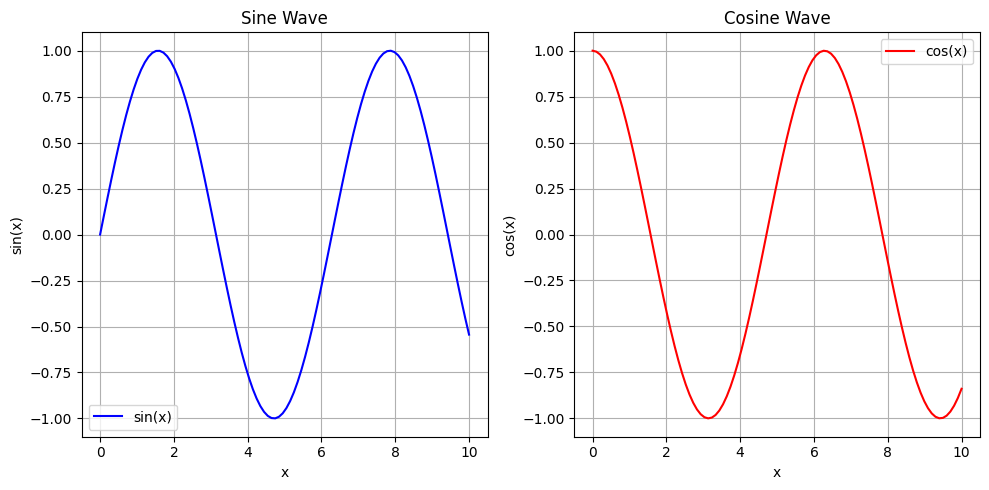

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Sine wave
plt.subplot(1, 2, 1)
plt.plot(x, y1, color='blue', label='sin(x)')
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)

# Second subplot: Cosine wave
plt.subplot(1, 2, 2)
plt.plot(x, y2, color='red', label='cos(x)')
plt.title('Cosine Wave')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Pratice yourself!

Category Summary：
              Total_Sales  Quantity
Category                          
Electronics        21160        79
Furniture           1500        11
Top Product: Laptop，Total Sales: 19000


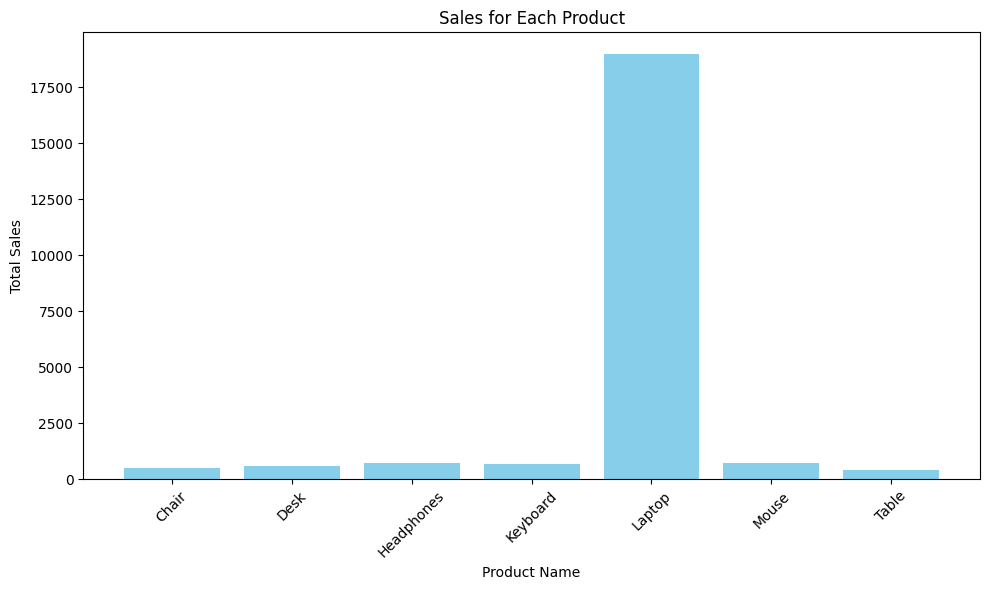

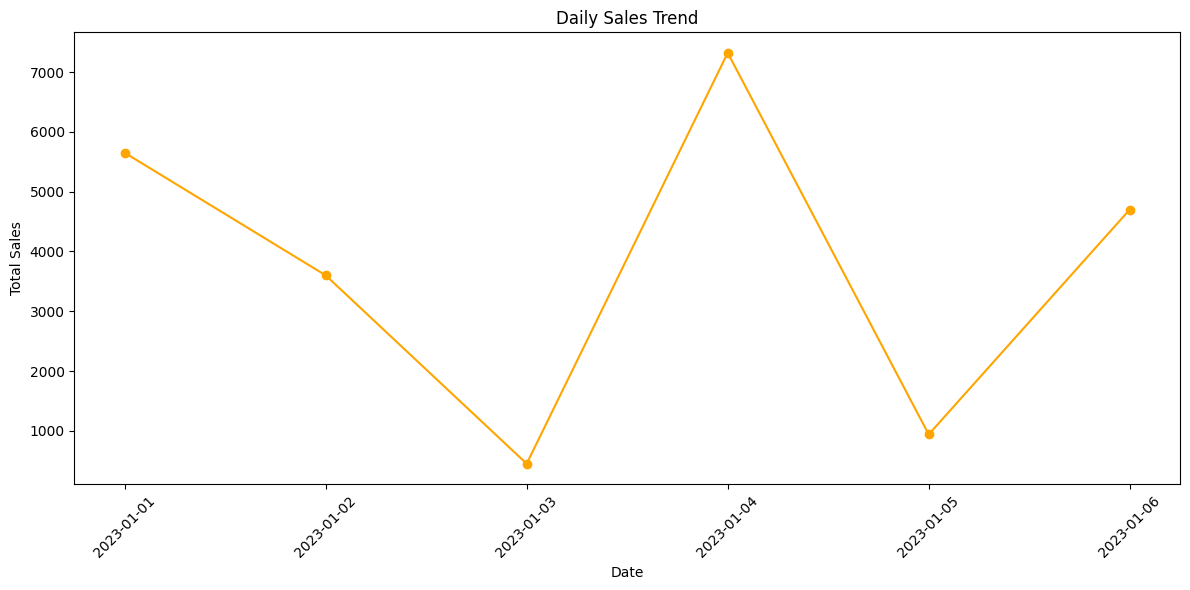

In [10]:
# 1. 讀取資料
df = pd.read_csv('sales_data.csv')

# 2. 新增 Total_Sales 欄位（Quantity × Price）
df['Total_Sales'] = df['Quantity'] * df['Price']

# 3. 按 Category 分組，計算總銷售額和總數量
category_summary = df.groupby('Category')[['Total_Sales', 'Quantity']].sum()
print("Category Summary：\n", category_summary)

# 4. 找出銷售額最高的產品
product_sales = df.groupby('Product')['Total_Sales'].sum()
top_product = product_sales.idxmax()
top_sales = product_sales.max()
print(f"Top Product: {top_product}，Total Sales: {top_sales}")

# 5. 繪製柱狀圖：每個產品的總銷售額
plt.figure(figsize=(10, 6))  # 設定圖表大小
product_sales = df.groupby('Product')['Total_Sales'].sum()
plt.bar(product_sales.index, product_sales.values, color='skyblue')  # 繪製柱狀圖
plt.title("Sales for Each Product")  # 圖表標題
plt.xlabel("Product Name")  # x 軸標籤
plt.ylabel("Total Sales")  # y 軸標籤
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_product.png')
plt.show()

# 6. 繪製折線圖：每天的總銷售額
df['Date'] = pd.to_datetime(df['Date'])  # 確保 Date 欄位為 datetime 格式
daily_sales = df.groupby('Date')['Total_Sales'].sum()
plt.figure(figsize=(12, 6))  # 設定圖表大小
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='orange')  # 繪製折線圖
plt.title("Daily Sales Trend")  # 圖表標題
plt.xlabel("Date")  # x 軸標籤
plt.ylabel("Total Sales")  # y 軸標籤
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_sales_trend.png')
plt.show()